## Zillow example

**1. Business Understanding:** The goal is to predict the sales price of properties in Salt Lake City, UT

**2. Getting the data:** what data we need?

**3. Preprocessing the data**

**4. Analyzing the data/data modeling**

**5. Evaluating the model**

### Step 2: getting the data

+ What? 
+ where? 
+ how many? 
+ how?




**Quick dirty try:**

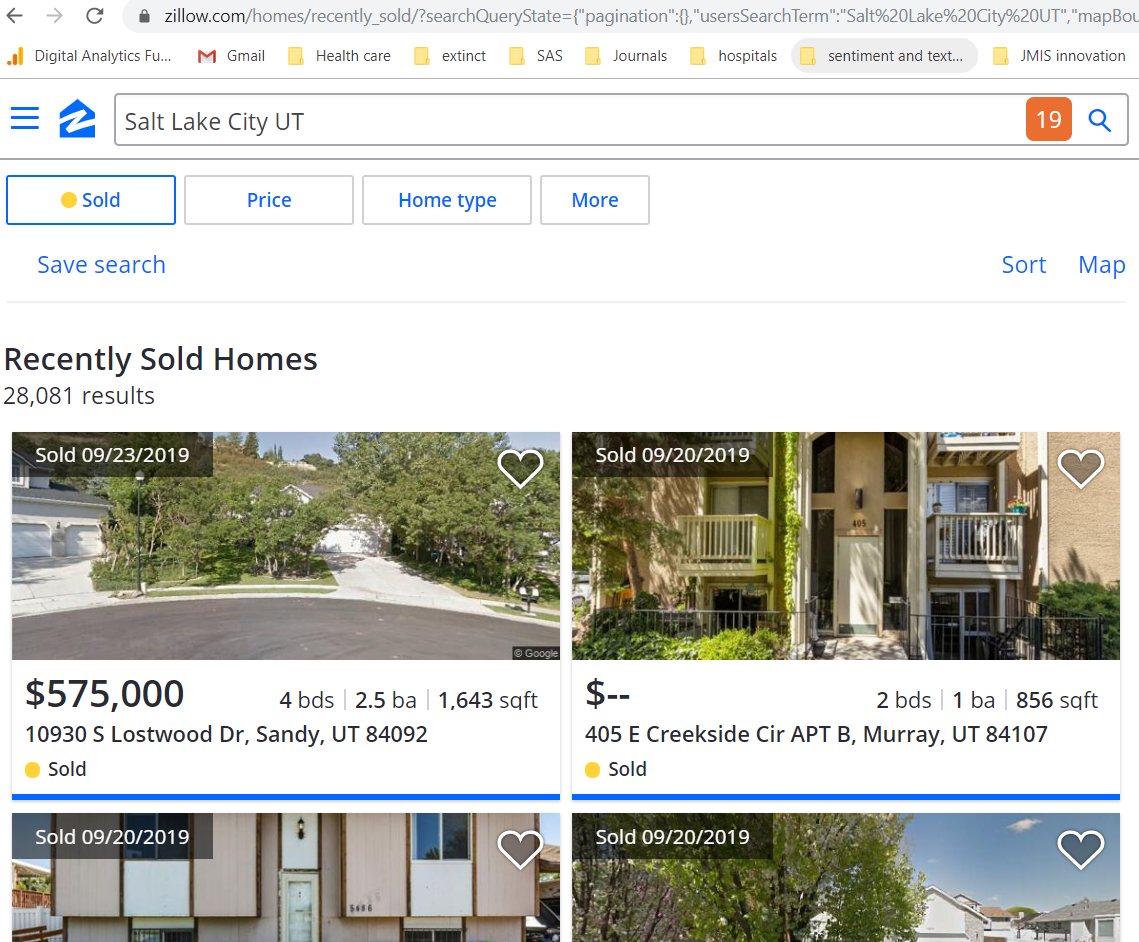

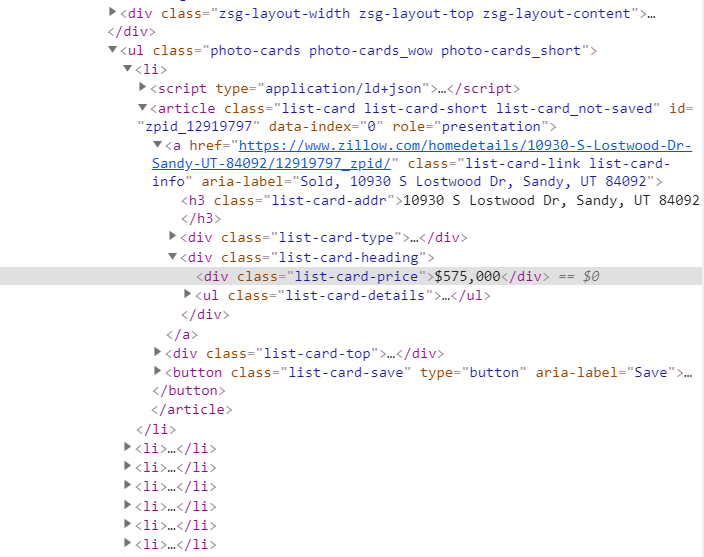

#### Scrapping Sold Price info from zillow

Inspect the sold price element and find the following html tags:

>`<div class="list-card-heading">`

> >   **`  <div class="list-card-price">$575,000</div>`**

>>    `  <ul class="list-card-details">
        <li>4<span class="list-card-label"> bds</span></li>
        <li>2.5<span class="list-card-label"> ba</span></li>
        <li>1,643<span class="list-card-label"> sqft</span></li>`      
>>   `</ul>`    

>`</div>`

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import time

In [2]:
url="https://www.zillow.com/salt-lake-city-ut/sold/"

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko)'}

r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.text, 'html.parser')


In [3]:
price = [p.text for p in soup.find_all('div',class_="list-card-price")]

In [4]:
price

['$--',
 '$--',
 '$--',
 '$249,500',
 '$--',
 '$268,500',
 '$257,500',
 '$--',
 '$--',
 '$641,000',
 '$--',
 '$--',
 '$708,000',
 '$--',
 '$380,000',
 '$430,000',
 '$150,000',
 '$--',
 '$169,000',
 '$220,000',
 '$--',
 '$--',
 '$462,000',
 '$380,000',
 '$--',
 '$--',
 '$--',
 '$--',
 '$495,550',
 '$460,000',
 '$--',
 '$449,900',
 '$--',
 '$--',
 '$--',
 '$--',
 '$9,000',
 '$--',
 '$--',
 '$--']

In [5]:
len(price)

40

### Scraping the date:

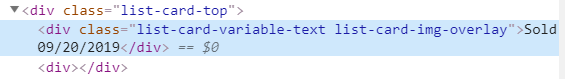

> `<div class="list-card-variable-text list-card-img-overlay">Sold 09/20/2019</div>`

In [6]:
sold_date = [d.text for d in soup.find_all('div',class_="list-card-variable-text list-card-img-overlay")]

In [7]:
sold_date

['Sold 09/20/2019',
 'Sold 09/19/2019',
 'Sold 09/18/2019',
 'Sold 09/16/2019',
 'Sold 09/13/2019',
 'Sold 09/13/2019',
 'Sold 09/13/2019',
 'Sold 09/11/2019',
 'Sold 09/10/2019',
 'Sold 09/10/2019',
 'Sold 09/10/2019',
 '41 minutes ago',
 'Sold 09/10/2019',
 'Sold 09/09/2019',
 'Sold 09/09/2019',
 'Sold 09/09/2019',
 'Sold 09/09/2019',
 'Sold 09/06/2019',
 'Sold 09/06/2019',
 'Sold 09/05/2019',
 'Sold 09/05/2019',
 'Sold 09/05/2019',
 'Sold 09/03/2019',
 'Sold 08/30/2019',
 'Sold 08/30/2019',
 'Sold 08/28/2019',
 'Sold 08/28/2019',
 'Sold 08/27/2019',
 'Sold 08/27/2019',
 'Sold 08/26/2019',
 'Sold 08/26/2019',
 'Sold 08/23/2019',
 'Sold 08/23/2019',
 'Sold 08/22/2019',
 'Sold 08/22/2019',
 'Sold 08/21/2019',
 'Sold 08/21/2019',
 'Sold 08/20/2019',
 'Sold 08/19/2019',
 'Sold 08/19/2019']

In [8]:
len(sold_date)

40

### Note: the potential issues could be that the sold price and the sold date and other info do not match perfectly.

It is better to get all info about one property in **ONE** html block

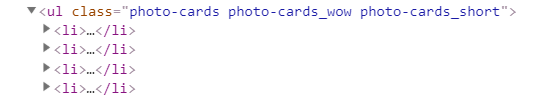

Each property is in a list `<li>...</li>` under `<ul class="photo-cards photo-cards_wow photo-cards_short">`

Strategy could be find `<ul class="photo-cards photo-cards_wow photo-cards_short">` and then loop over all `<li>...</li>` , to get all info about ONE property in each loop.

In [9]:
cards = soup.find('ul', class_="photo-cards photo-cards_wow photo-cards_short")

In [10]:
cards

<ul class="photo-cards photo-cards_wow photo-cards_short"><li><script type="application/ld+json">{"@type":"SingleFamilyResidence","@context":"http://schema.org","name":"1993 W Independence Blvd, Salt Lake City, UT 84116","floorSize":{"@type":"QuantitativeValue","@context":"http://schema.org","value":"1,794"},"numberOfRooms":4,"address":{"@type":"PostalAddress","@context":"http://schema.org","streetAddress":"1993 W Independence Blvd","addressLocality":"Salt Lake City","addressRegion":"UT","postalCode":"84116"},"geo":{"@type":"GeoCoordinates","@context":"http://schema.org","latitude":40.801565,"longitude":-111.947893},"url":"/homedetails/1993-W-Independence-Blvd-Salt-Lake-City-UT-84116/12709599_zpid/"}</script><article class="list-card list-card-short list-card_not-saved" data-index="0" id="zpid_12709599" role="presentation"><a aria-label="Sold, 1993 W Independence Blvd, Salt Lake City, UT 84116" class="list-card-link list-card-info" href="https://www.zillow.com/homedetails/1993-W-Indepe

In [11]:
x = [u for u in cards.find_all('li')]

In [13]:
x[1]

<li>4<span class="list-card-label"> <!-- -->bds</span></li>

In [14]:
properties = [p for p in cards.find_all('li', recursive=False)]

In [15]:
len(properties)

41

In [19]:
properties[3]

<li><script type="application/ld+json">{"@type":"SingleFamilyResidence","@context":"http://schema.org","name":"230 East Broadway Apt 610, Salt Lake City, UT 84111","floorSize":{"@type":"QuantitativeValue","@context":"http://schema.org","value":"722"},"numberOfRooms":1,"address":{"@type":"PostalAddress","@context":"http://schema.org","streetAddress":"230 East Broadway APT 610","addressLocality":"Salt Lake City","addressRegion":"UT","postalCode":"84111"},"geo":{"@type":"GeoCoordinates","@context":"http://schema.org","latitude":40.762224,"longitude":-111.884288},"url":"/homedetails/230-East-Broadway-APT-610-Salt-Lake-City-UT-84111/89428312_zpid/"}</script><article class="list-card list-card-short list-card_not-saved" data-index="2" id="zpid_89428312" role="presentation"><a aria-label="Sold, 230 East Broadway APT 610, Salt Lake City, UT 84111" class="list-card-link list-card-info" href="https://www.zillow.com/homedetails/230-East-Broadway-APT-610-Salt-Lake-City-UT-84111/89428312_zpid/"><h3

In [20]:
property_info = []

In [21]:
for p in properties:
    try:
        price = p.find('div',class_="list-card-price").get_text()
        sold_date = p.find('div',class_="list-card-variable-text list-card-img-overlay").text
        address = p.find('h3',class_="list-card-addr").text
        print(address, sold_date, price)
        property_info.append((address, sold_date, price))
    except:continue    

1993 W Independence Blvd, Salt Lake City, UT 84116 Sold 09/20/2019 $--
248 E Coatsville Ave, Salt Lake City, UT 84115 Sold 09/19/2019 $--
230 East Broadway APT 610, Salt Lake City, UT 84111 Sold 09/18/2019 $--
845 E 100 S APT 106, Salt Lake City, UT 84102 Sold 09/16/2019 $249,500
8 E Hillside Ave APT 501, Salt Lake City, UT 84103 Sold 09/13/2019 $--
1303 W 400 S, Salt Lake City, UT 84104 Sold 09/13/2019 $268,500
1319 S Glendale Dr, Salt Lake City, UT 84104 Sold 09/13/2019 $257,500
1988 S 1100 E UNIT 305, Salt Lake City, UT 84106 Sold 09/11/2019 $--
29 S State St APT 705, Salt Lake City, UT 84111 Sold 09/10/2019 $--
340 C St, Salt Lake City, UT 84103 Sold 09/10/2019 $641,000
1472 E Roosevelt Ave, Salt Lake City, UT 84105 Sold 09/10/2019 $--
425 S 1000 E APT 313C, Salt Lake City, UT 84102 41 minutes ago $--
79 O St, Salt Lake City, UT 84103 Sold 09/10/2019 $708,000
1935 S 1500 E, Salt Lake City, UT 84105 Sold 09/09/2019 $--
515 S 1000 E APT 602, Salt Lake City, UT 84102 Sold 09/09/2019 $

In [22]:
property_info

[('1993 W Independence Blvd, Salt Lake City, UT 84116',
  'Sold 09/20/2019',
  '$--'),
 ('248 E Coatsville Ave, Salt Lake City, UT 84115', 'Sold 09/19/2019', '$--'),
 ('230 East Broadway APT 610, Salt Lake City, UT 84111',
  'Sold 09/18/2019',
  '$--'),
 ('845 E 100 S APT 106, Salt Lake City, UT 84102',
  'Sold 09/16/2019',
  '$249,500'),
 ('8 E Hillside Ave APT 501, Salt Lake City, UT 84103',
  'Sold 09/13/2019',
  '$--'),
 ('1303 W 400 S, Salt Lake City, UT 84104', 'Sold 09/13/2019', '$268,500'),
 ('1319 S Glendale Dr, Salt Lake City, UT 84104',
  'Sold 09/13/2019',
  '$257,500'),
 ('1988 S 1100 E UNIT 305, Salt Lake City, UT 84106',
  'Sold 09/11/2019',
  '$--'),
 ('29 S State St APT 705, Salt Lake City, UT 84111', 'Sold 09/10/2019', '$--'),
 ('340 C St, Salt Lake City, UT 84103', 'Sold 09/10/2019', '$641,000'),
 ('1472 E Roosevelt Ave, Salt Lake City, UT 84105', 'Sold 09/10/2019', '$--'),
 ('425 S 1000 E APT 313C, Salt Lake City, UT 84102', '41 minutes ago', '$--'),
 ('79 O St, Sal

## A better way

Analy zillow page source carefully, There is a json data block:
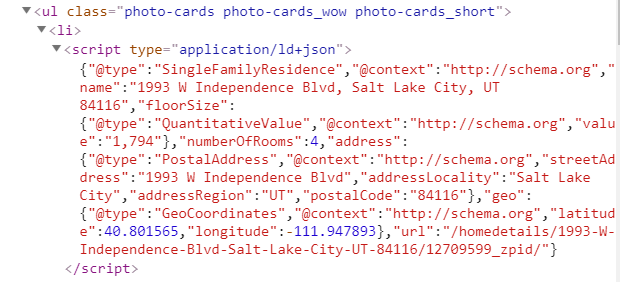

There is a json data block:

>`<script type="application/ld+json">`

We can find all these json part, each json contains the basic info for each property.

In [23]:
j= [x.get_text() for x in soup.find_all('script', type="application/ld+json")]

First try on ONE json

In [24]:
j[0]

'{"@type":"SingleFamilyResidence","@context":"http://schema.org","name":"1993 W Independence Blvd, Salt Lake City, UT 84116","floorSize":{"@type":"QuantitativeValue","@context":"http://schema.org","value":"1,794"},"numberOfRooms":4,"address":{"@type":"PostalAddress","@context":"http://schema.org","streetAddress":"1993 W Independence Blvd","addressLocality":"Salt Lake City","addressRegion":"UT","postalCode":"84116"},"geo":{"@type":"GeoCoordinates","@context":"http://schema.org","latitude":40.801565,"longitude":-111.947893},"url":"/homedetails/1993-W-Independence-Blvd-Salt-Lake-City-UT-84116/12709599_zpid/"}'

In [25]:
p=json.loads(j[0])

In [26]:
p['@type']

'SingleFamilyResidence'

In [27]:
p['name']

'1993 W Independence Blvd, Salt Lake City, UT 84116'

In [28]:
p["numberOfRooms"]

4

In [29]:
p["address"]["postalCode"]

'84116'

In [30]:
p['url']

'/homedetails/1993-W-Independence-Blvd-Salt-Lake-City-UT-84116/12709599_zpid/'

### Save all info into pandas dataframe

In [31]:
columns=["address","url"]
info = [] 

for x in j:
    p = json.loads(x)
    info.append([p['name'],"http://zilow.com"+p["url"]])
    
zillow_sold = pd.DataFrame(info,columns=columns)
   

In [32]:
zillow_sold

,address,url
0,"1993 W Independence Blvd, Salt Lake City, UT 8...",http://zilow.com/homedetails/1993-W-Independen...
1,"248 E Coatsville Ave, Salt Lake City, UT 84115",http://zilow.com/homedetails/248-E-Coatsville-...
2,"230 East Broadway Apt 610, Salt Lake City, UT ...",http://zilow.com/homedetails/230-East-Broadway...
3,"845 E 100 S Apt 106, Salt Lake City, UT 84102",http://zilow.com/homedetails/845-E-100-S-APT-1...
4,"8 E Hillside Ave Apt 501, Salt Lake City, UT 8...",http://zilow.com/homedetails/8-E-Hillside-Ave-...
5,"1303 W 400 S, Salt Lake City, UT 84104",http://zilow.com/homedetails/1303-W-400-S-Salt...
6,"1319 S Glendale Dr, Salt Lake City, UT 84104",http://zilow.com/homedetails/1319-S-Glendale-D...
7,"1988 S 1100 E Unit 305, Salt Lake City, UT 84106",http://zilow.com/homedetails/1988-S-1100-E-UNI...
8,"29 S State St Apt 705, Salt Lake City, UT 84111",http://zilow.com/homedetails/29-S-State-St-APT...
9,"340 C St, Salt Lake City, UT 84103",http://zilow.com/homedetails/340-C-St-Salt-Lak...


## Now, we only download ONE page, there are 20 in total

Loop over all pages to get the same info

In [33]:
url = ["https://www.zillow.com/salt-lake-city-ut/sold/"]
url2 = ["https://www.zillow.com/salt-lake-city-ut/sold/"+str(i)+"_p" for i in range(2,21)]

In [34]:
url + url2

['https://www.zillow.com/salt-lake-city-ut/sold/',
 'https://www.zillow.com/salt-lake-city-ut/sold/2_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/3_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/4_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/5_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/6_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/7_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/8_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/9_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/10_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/11_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/12_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/13_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/14_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/15_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/16_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/17_p',
 'https://www.zillow.com/salt-lake-city-ut/sold/18_p',
 'https://www.zillow.c

In [35]:
columns=["address","url"]
info = [] 

for u in url + url2:
    print(u)
    r = requests.get(u, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    j= [json.loads(x.get_text()) for x in soup.find_all('script', type="application/ld+json")]
    print(len(j))
    
    for p in j:
        info.append([p['name'],"http://zilow.com"+p["url"]])
    
    zillow_sold = pd.DataFrame(info,columns=columns)
    
    # time.sleep(1)
    

https://www.zillow.com/salt-lake-city-ut/sold/
40
https://www.zillow.com/salt-lake-city-ut/sold/2_p
40
https://www.zillow.com/salt-lake-city-ut/sold/3_p
40
https://www.zillow.com/salt-lake-city-ut/sold/4_p
40
https://www.zillow.com/salt-lake-city-ut/sold/5_p
40
https://www.zillow.com/salt-lake-city-ut/sold/6_p
40
https://www.zillow.com/salt-lake-city-ut/sold/7_p
40
https://www.zillow.com/salt-lake-city-ut/sold/8_p
40
https://www.zillow.com/salt-lake-city-ut/sold/9_p
40
https://www.zillow.com/salt-lake-city-ut/sold/10_p
40
https://www.zillow.com/salt-lake-city-ut/sold/11_p
40
https://www.zillow.com/salt-lake-city-ut/sold/12_p
40
https://www.zillow.com/salt-lake-city-ut/sold/13_p
40
https://www.zillow.com/salt-lake-city-ut/sold/14_p
40
https://www.zillow.com/salt-lake-city-ut/sold/15_p
40
https://www.zillow.com/salt-lake-city-ut/sold/16_p
40
https://www.zillow.com/salt-lake-city-ut/sold/17_p
40
https://www.zillow.com/salt-lake-city-ut/sold/18_p
40
https://www.zillow.com/salt-lake-city-ut

In [36]:
zillow_sold

,address,url
0,"1993 W Independence Blvd, Salt Lake City, UT 8...",http://zilow.com/homedetails/1993-W-Independen...
1,"248 E Coatsville Ave, Salt Lake City, UT 84115",http://zilow.com/homedetails/248-E-Coatsville-...
2,"230 East Broadway Apt 610, Salt Lake City, UT ...",http://zilow.com/homedetails/230-East-Broadway...
3,"845 E 100 S Apt 106, Salt Lake City, UT 84102",http://zilow.com/homedetails/845-E-100-S-APT-1...
4,"8 E Hillside Ave Apt 501, Salt Lake City, UT 8...",http://zilow.com/homedetails/8-E-Hillside-Ave-...
5,"1303 W 400 S, Salt Lake City, UT 84104",http://zilow.com/homedetails/1303-W-400-S-Salt...
6,"1319 S Glendale Dr, Salt Lake City, UT 84104",http://zilow.com/homedetails/1319-S-Glendale-D...
7,"1988 S 1100 E Unit 305, Salt Lake City, UT 84106",http://zilow.com/homedetails/1988-S-1100-E-UNI...
8,"340 C St, Salt Lake City, UT 84103",http://zilow.com/homedetails/340-C-St-Salt-Lak...
9,"29 S State St Apt 705, Salt Lake City, UT 84111",http://zilow.com/homedetails/29-S-State-St-APT...


## Next step: get detailed info for each property

Loop over each url to get more detailed info

`https://www.zillow.com/homedetails/1993-W-Independence-Blvd-Salt-Lake-City-UT-84116/12709599_zpid/?fullpage=true`

In [58]:
url="http://www.redfin.com/UT/Salt-Lake-City/1025-N-Bonneville-Dr-84103/unit-00000E/home/91710691"

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko)'}

r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.text, 'html.parser')

In [61]:
desc = [p.text for p in soup.find('div', class_= "remarks")]
desc

["Over the last 10 years, this estate like home in the upper avenues has been completely updated inside and out! 50-year roof, brand new vinyl  &  hardy board exterior, top of the line air conditioners, furnaces, fireplaces and more! Home sits on over Â½ acre lot-much of which is FLAT and perfect for entertaining with professionally installed  outdoor lighting, reinforced, colored and stamped concrete to enjoy now, or ready to add your own outdoor kitchen or hot tub. In-ground trampoline with enough space to enjoy ample gardening or add your own swimming pool. Enjoy a variety of apples, peaches, and cherries from the mature fruit trees. No backyard neighbors, as the rear of the home is surrounded by BLM land. South facing front entrance overlooks the quiet, tranquil neighborhood where an annual ice-cream and pool party are held. A neighborhood swimming pool is just blocks away. As an added bonus, this home does NOT have city sidewalks, saving you the effort of shoveling snow covered si